# We Choose to go with Emerald!

In [5]:
# general imports
from math import pi
import json
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from braket.aws import AwsDevice
from braket.circuits import Circuit
from braket.devices import Devices

%matplotlib inline

In [3]:
# set up the Rigetti Ankaa-3 device
device = AwsDevice(Devices.IQM.Emerald)
device.queue_depth()
total_connectivity = device.properties.paradigm.connectivity.connectivityGraph
qubits = [qub for qub in total_connectivity]
qubits = [1,2,3]
qubits.sort(key=float)

print("All the qubits in Emerald are:", qubits)

# list the native gate set
print("The native gates for the", device.name, "device are:")
for gate in device.properties.paradigm.nativeGateSet:
    print(gate)

All the qubits in Emerald are: [1, 2, 3]
The native gates for the Emerald device are:
cz
prx
cc_prx
measure_ff


In [48]:
def Simple_Identity_Circuit(qubits = [1,2,3]):
    Simple_Identity = Circuit()
    for qub in qubits:
        qub_in = int(qub)
        Simple_Identity = Simple_Identity.prx(target = qub_in, angle_1 = pi, angle_2 = 0)
        Simple_Identity = Simple_Identity.prx(target = qub_in, angle_1 = pi, angle_2 = 0)
    return Simple_Identity


In [49]:
def Spin_Echo_Identity_Circuit(qubits = [1,2,3]):
    Spin_Echo_Identity = Circuit()
    for qub in qubits:
        qub_in = int(qub)
        Spin_Echo_Identity = Spin_Echo_Identity.prx(target = qub_in, angle_1 = pi/2, angle_2 = 0)
        Spin_Echo_Identity = Spin_Echo_Identity.prx(target = qub_in, angle_1 = pi, angle_2 = pi/2)
        Spin_Echo_Identity = Spin_Echo_Identity.prx(target = qub_in, angle_1 = pi/2, angle_2 = 0)
        Spin_Echo_Identity = Spin_Echo_Identity.prx(target = qub_in, angle_1 = pi, angle_2 = pi/2)
    return Spin_Echo_Identity

In [50]:
def Simple_Flip_Circuit(qubits = [1,2,3]):
    Simple_Flip = Circuit()
    for qub in qubits:
        qub_in = int(qub)
        Simple_Flip = Simple_Flip.prx(target = qub_in, angle_1 = pi/2, angle_2 = 0)
        Simple_Flip = Simple_Flip.prx(target = qub_in, angle_1 = pi/2, angle_2 = 0)
    return Simple_Flip


In [51]:
def Spin_Echo_Flip_Circuit(qubits = [1,2,3]):
    Spin_Echo_Flip = Circuit()
    for qub in qubits:
        qub_in = int(qub)
        Spin_Echo_Flip = Spin_Echo_Flip.prx(target = qub_in, angle_1 = pi/2, angle_2 = 0)
        Spin_Echo_Flip = Spin_Echo_Flip.prx(target = qub_in, angle_1 = pi, angle_2 = pi/2)
        Spin_Echo_Flip = Spin_Echo_Flip.prx(target = qub_in, angle_1 = -pi/2, angle_2 = 0)
        Spin_Echo_Flip = Spin_Echo_Flip.prx(target = qub_in, angle_1 = pi, angle_2 = pi/2)
    return Spin_Echo_Flip

# Emulating Emerald!

In [52]:
from braket.aws.aws_device import AwsDevice

emerald = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Emerald")
emerald_emulator = emerald.emulator()
native_gates = emerald.properties.paradigm.nativeGateSet
print(f"Native gates for {emerald.name}: {native_gates}")

Native gates for Emerald: ['cz', 'prx', 'cc_prx', 'measure_ff']


In [57]:
Verbatim_Simple_Flip = Circuit().add_verbatim_box(Simple_Flip_Circuit())

Simple_Flip_emulator_run = emerald_emulator.run(Verbatim_Simple_Flip, shots=8192)
Simple_Flip_emulator_result = Simple_Flip_emulator_run.result()
Simple_Flip_emulator_counts = Simple_Flip_emulator_result.measurement_counts

In [58]:
Verbatim_Simple_Identity = Circuit().add_verbatim_box(Simple_Identity_Circuit())

Simple_Identity_emulator_run = emerald_emulator.run(Verbatim_Simple_Identity, shots=8192)
Simple_Identity_emulator_result = Simple_Identity_emulator_run.result()
Simple_Identity_emulator_counts = Simple_Identity_emulator_result.measurement_counts


In [59]:
Verbatim_Spin_Echo_Flip = Circuit().add_verbatim_box(Spin_Echo_Flip_Circuit())

Spin_Echo_Flip_emulator_run = emerald_emulator.run(Verbatim_Spin_Echo_Flip, shots=8192)
Spin_Echo_Flip_emulator_result = Spin_Echo_Flip_emulator_run.result()
Spin_Echo_Flip_emulator_counts = Spin_Echo_Flip_emulator_result.measurement_counts

In [60]:
Verbatim_Spin_Echo_Identity = Circuit().add_verbatim_box(Spin_Echo_Identity_Circuit())

Spin_Echo_Identity_emulator_run = emerald_emulator.run(Verbatim_Spin_Echo_Identity, shots=8192)
Spin_Echo_Identity_emulator_result = Spin_Echo_Identity_emulator_run.result()
Spin_Echo_Identity_emulator_counts = Spin_Echo_Identity_emulator_result.measurement_counts

In [109]:
# import numpy as np
arr = np.array(Spin_Echo_Identity_emulator_result.measured_qubits)

array([1, 2, 3])

In [107]:
Spin_Echo_Identity_emulator_run.measured_qubits

AttributeError: 'LocalQuantumTask' object has no attribute 'measured_qubits'

In [102]:
import os

current_directory = os.getcwd()
print(current_directory)

/home/ec2-user/SageMaker/measurement-test


In [104]:
Simple_Flip_emulator_result
Simple_Identity_emulator_result
Spin_Echo_Flip_emulator_result
Spin_Echo_Identity_emulator_result
np.savetxt("/home/ec2-user/SageMaker/measurement-test/Simple_Flip_emulator_result.csv", Simple_Flip_emulator_result.measurements, delimiter=",")
np.savetxt("/home/ec2-user/SageMaker/measurement-test/Simple_Identity_emulator_result.csv", Simple_Identity_emulator_result.measurements, delimiter=",")
np.savetxt("/home/ec2-user/SageMaker/measurement-test/Spin_Echo_Flip_emulator_result.csv", Spin_Echo_Flip_emulator_result.measurements, delimiter=",")
np.savetxt("/home/ec2-user/SageMaker/measurement-test/Spin_Echo_Identity_emulator_result.csv", Spin_Echo_Identity_emulator_result.measurements, delimiter=",")


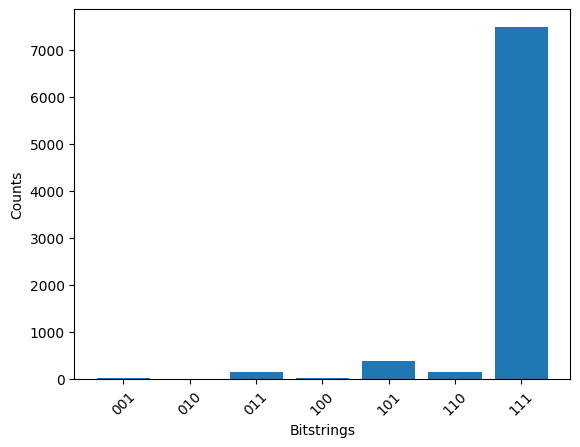

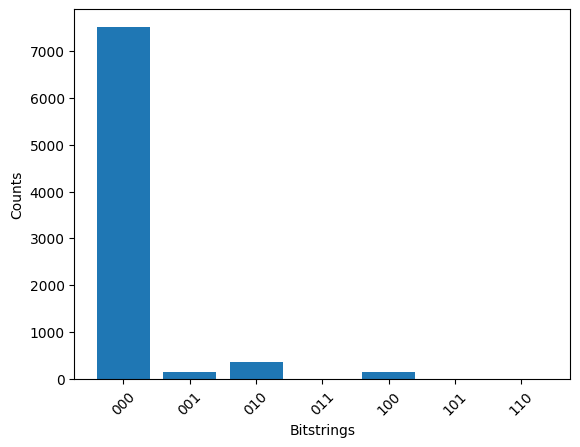

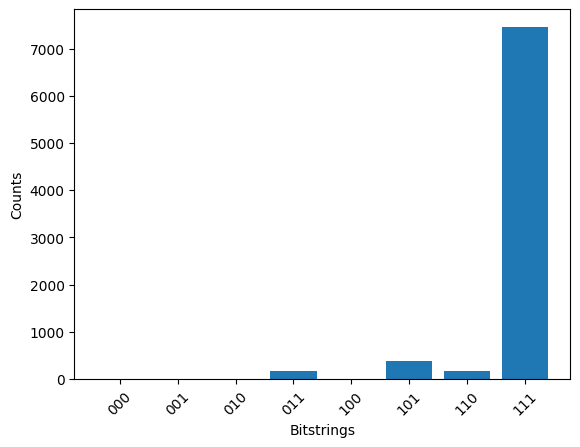

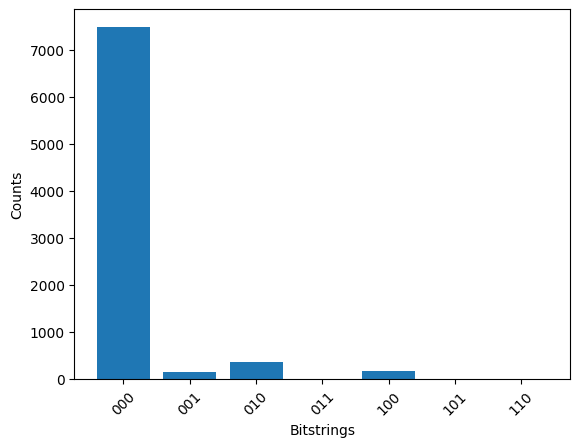

In [63]:
for emulator_counts in [Simple_Flip_emulator_counts,Simple_Identity_emulator_counts,Spin_Echo_Flip_emulator_counts,Spin_Echo_Identity_emulator_counts]:
    plt.bar(
        sorted(emulator_counts.keys()), [emulator_counts[k] for k in sorted(emulator_counts.keys())]
    )
    plt.xlabel("Bitstrings")
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    # plt.title(emulator_counts)
    plt.show()

In [6]:
device = AwsDevice(Devices.IQM.Emerald)

execution_windows = device.properties.service.executionWindows
connectivity_graph = device.properties.paradigm.connectivity
calibration = device.properties.standardized.dict()

print(f"The availability windows for {device.name}:\n{execution_windows}\n")
print(f"The connectivity graph of the qubits for this device:\n {connectivity_graph}\n")
# print("Calibration data:\n", json.dumps(calibration, sort_keys=True, indent=2))
with open('AWS_Qubit_Calibration.json', 'w', encoding='utf-8') as f:
    json.dump(calibration, f, indent=4) # 'indent=4' makes the file human-readable


The availability windows for Emerald:
[DeviceExecutionWindow(executionDay=<ExecutionDay.WEEKDAYS: 'Weekdays'>, windowStartHour=datetime.time(0, 0), windowEndHour=datetime.time(3, 29, 59)), DeviceExecutionWindow(executionDay=<ExecutionDay.WEEKDAYS: 'Weekdays'>, windowStartHour=datetime.time(7, 0), windowEndHour=datetime.time(16, 29, 59)), DeviceExecutionWindow(executionDay=<ExecutionDay.WEEKDAYS: 'Weekdays'>, windowStartHour=datetime.time(20, 0), windowEndHour=datetime.time(23, 59, 59))]

The connectivity graph of the qubits for this device:
 fullyConnected=False connectivityGraph={'1': ['2', '5'], '2': ['1', '6'], '5': ['1', '4', '6', '11'], '6': ['2', '5', '7', '12'], '3': ['4', '9'], '4': ['3', '5', '10'], '9': ['3', '8', '10', '17'], '10': ['4', '9', '11'], '11': ['5', '10', '12', '19'], '7': ['6'], '12': ['6', '11', '13', '20'], '8': ['9', '16'], '16': ['8', '15', '17', '24'], '17': ['9', '16', '18', '25'], '19': ['11', '18', '20', '27'], '13': ['12', '14', '21'], '20': ['12', '19'

Initializing solver...
Graph Degree: 4. Solving with max 5 circuits.
----------------------------------------
VERIFICATION REPORT
----------------------------------------
Total Number of Circuits:    4
Total Unique Edges in Graph: 82
Unique Edges Tested:         82
Total Tests Performed:       92 (Avg 1.12x redundancy)
Coverage:                    100.0%

[PASS] All connections tested at least once.
----------------------------------------

DONE in 0.0016 seconds.
Total Edges in Graph: 82
------------------------------
Efficiency: 0.9259259259259259


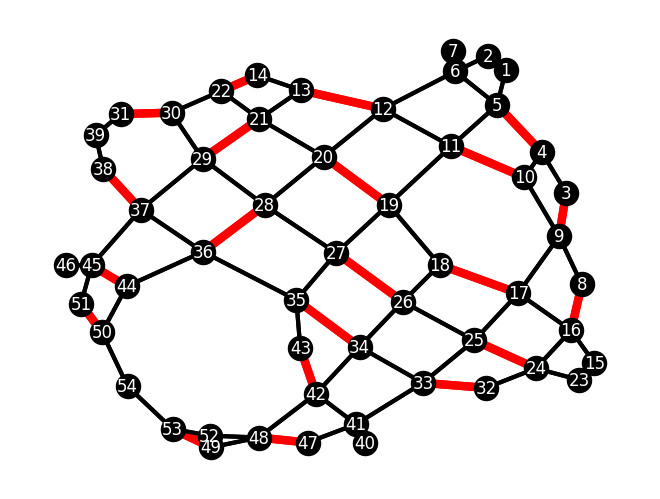

Efficiency: 0.8148148148148148


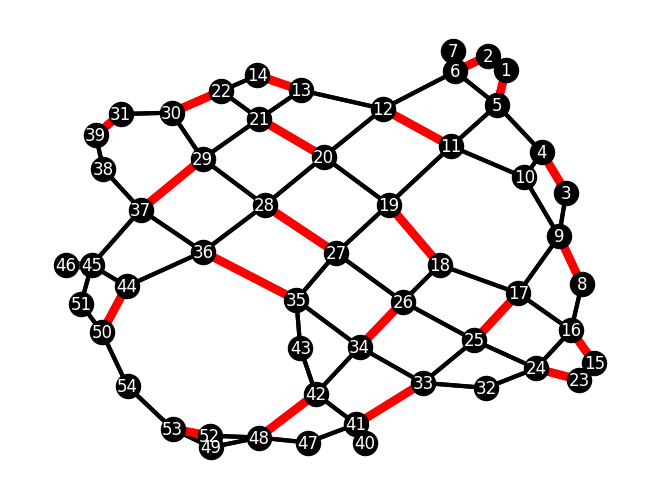

Efficiency: 0.8148148148148148


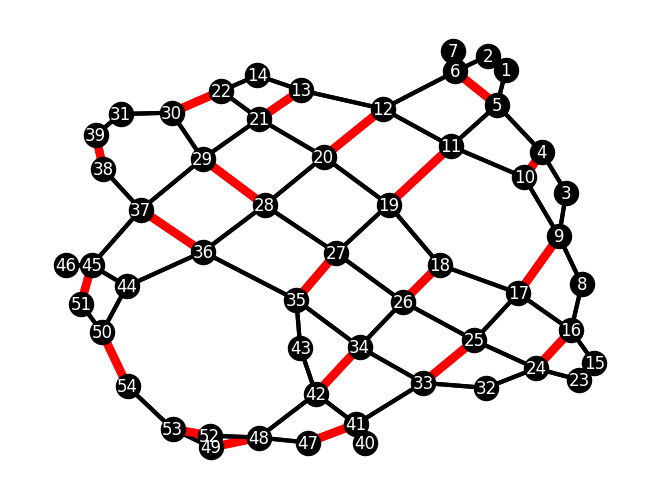

Efficiency: 0.8518518518518519


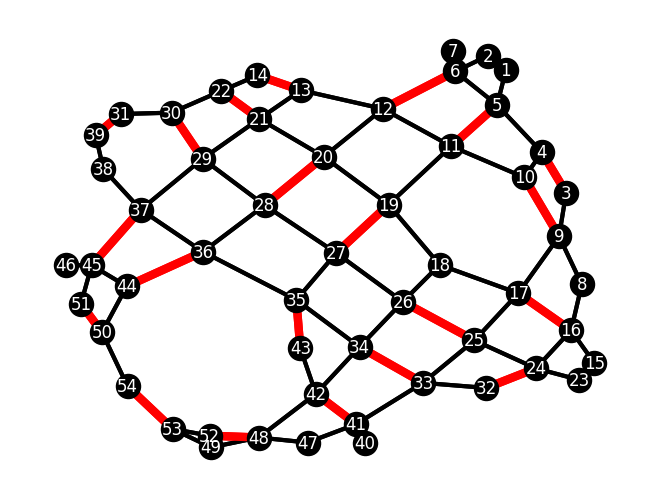

[{('30', '31'), ('3', '9'), ('10', '11'), ('28', '36'), ('21', '29'), ('49', '53'), ('26', '27'), ('8', '16'), ('32', '33'), ('37', '38'), ('17', '18'), ('12', '13'), ('4', '5'), ('19', '20'), ('24', '25'), ('14', '22'), ('34', '35'), ('40', '41'), ('1', '2'), ('15', '23'), ('42', '43'), ('50', '51'), ('44', '45'), ('47', '48'), ('6', '7')}, {('13', '14'), ('52', '53'), ('17', '25'), ('31', '39'), ('45', '46'), ('26', '34'), ('8', '9'), ('29', '37'), ('42', '48'), ('20', '21'), ('23', '24'), ('15', '16'), ('11', '12'), ('18', '19'), ('35', '36'), ('1', '5'), ('2', '6'), ('33', '41'), ('22', '30'), ('44', '50'), ('27', '28'), ('3', '4')}, {('52', '53'), ('5', '6'), ('12', '20'), ('50', '54'), ('4', '10'), ('9', '17'), ('27', '35'), ('25', '33'), ('48', '49'), ('18', '26'), ('11', '19'), ('28', '29'), ('16', '24'), ('13', '21'), ('1', '2'), ('38', '39'), ('41', '47'), ('22', '30'), ('34', '42'), ('15', '23'), ('36', '37'), ('45', '51')}, {('13', '14'), ('53', '54'), ('31', '39'), ('36', 

In [9]:
import graphconnector as gc

G = device.topology_graph

start_time = time.time()
print("Initializing solver...")
total_connectivity = device.properties.paradigm.connectivity.connectivityGraph
qubits = [qub for qub in total_connectivity]
qubits.sort(key=float)

final_sets, solver = gc.generate_circuits(total_connectivity, max_sets=4, compaction = True, redundancy = True)

end_time = time.time()

print(f"\nDONE in {end_time - start_time:.4f} seconds.")
print(f"Total Edges in Graph: {len(solver.all_edges)}")
print("-" * 30)

for i in range(len(final_sets)):
    
    red_edges = list(final_sets[i])
    connected_qubits = [str(qub_pair[0]) for qub_pair in red_edges] + [str(qub_pair[1]) for qub_pair in red_edges]
    connected_qubits.sort(key=float)
    # print("Connected Qubits:\n",connected_qubits,"\n")
    # print("Total Qubits:\n",qubits,"\n")
    print("Efficiency:", len(connected_qubits)/len(qubits))
    
    # 3. Create a color map based on G.edges()
    edge_colors = []
    widths = []
    for u, v in G.edges():
        u = str(u)
        v = str(v)
        # Check if the edge (or its reverse) is in your red_subset
        if (u, v) in red_edges or (v, u) in red_edges:
            edge_colors.append('red')
            widths.append(6)
        else:
            edge_colors.append('black')
            widths.append(3)
    
    black_edges = [e for e in G.edges() if e not in red_edges and (e[1], e[0]) not in red_edges]

    if i == 0:
        pos = nx.forceatlas2_layout(G)
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color = 'black' ,font_color="white", width = widths, arrows=False)
    plt.show()
print(final_sets)

In [14]:
def N_CZ_Circuit(qubit_set,N):
    N_CZ = Circuit()
    for qubo,qubi in qubit_set:
        qubo = int(qubo)
        qubi = int(qubi)
        i = 0
        while i < N:
            N_CZ.cz(qubo,qubi)
            i += 1
    return N_CZ

In [21]:
N_CZ = N_CZ_Circuit(final_sets[0],2)

# print(N_CZ)

In [22]:
N_CZ_list = [N_CZ_Circuit(final_sets[circ_idx],20) for circ_idx in range(len(final_sets))]

In [40]:
limited_final = [{('1', '2'), ('6', '7')},{('1', '5'), ('2', '6')},{('1', '2'),('5', '6')},{('1', '2')}]

In [39]:
final_sets[3]

{('1', '2'),
 ('13', '14'),
 ('15', '23'),
 ('16', '17'),
 ('19', '27'),
 ('20', '28'),
 ('21', '22'),
 ('24', '32'),
 ('25', '26'),
 ('29', '30'),
 ('3', '4'),
 ('31', '39'),
 ('33', '34'),
 ('35', '43'),
 ('36', '44'),
 ('37', '45'),
 ('41', '42'),
 ('48', '52'),
 ('5', '11'),
 ('50', '51'),
 ('53', '54'),
 ('6', '12'),
 ('9', '10')}

In [44]:
N_CZ_list = [N_CZ_Circuit(limited_final[circ_idx],20) for circ_idx in range(len(final_sets))]

In [47]:
emerald = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Emerald")
emerald_emulator = emerald.emulator()

Verbatim_Circuits = [Circuit().add_verbatim_box(CIRCUIT) for CIRCUIT in N_CZ_list]

In [50]:
Verbatim_tasks = [emerald_emulator.run(VERB_CIRCS, shots=8192) for VERB_CIRCS in Verbatim_Circuits]

In [55]:
Verbatim_result = [TASK.result() for TASK in Verbatim_tasks]

In [54]:
print(Verbatim_result[0])

<bound method LocalQuantumTask.result of LocalQuantumTask('id':b8f902b9-bd7a-4e86-b7f8-b16404c63d85)>


In [59]:
Verbatim_measured_qubits = [RESULTS.measured_qubits for RESULTS in Verbatim_result]
Verbatim_measurements = [RESULTS.measurements for RESULTS in Verbatim_result]
# print((np.array(Verbatim_measurements)).size)

for i in range(len(Verbatim_Circuits)):
    np.savetxt(f"/home/ec2-user/SageMaker/measurement-test/Verbatim_20_CZ_measured_qubits_{i}.csv", Verbatim_measured_qubits[i], delimiter=",")
    np.savetxt(f"/home/ec2-user/SageMaker/measurement-test/Verbatim_20_CZ_measurements_{i}.csv", Verbatim_measurements[i], delimiter=",")


In [62]:

limited_final

[{('1', '2'), ('6', '7')},
 {('1', '5'), ('2', '6')},
 {('1', '2'), ('5', '6')},
 {('1', '2')}]